# Car Prices Estimation using Linear Regression

### The goal of this project is to estimate used car prices based on several of its features described below, While also extracting insights about the influence of these features on the car price .

## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as mticker
%matplotlib inline
plt.style.use("seaborn-v0_8")

## Loading the dataset

In [96]:
#df = pd.read_csv('https://raw.githubusercontent.com/TameemAlghazaly/Data-Science-Projects/main/Car%20Prices%20Linear%20Regression/car_prices.csv')
df = pd.read_csv('car_prices.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Cleaning the dataset




In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   year          46578 non-null  int64              
 1   make          46578 non-null  object             
 2   model         46578 non-null  object             
 3   trim          46578 non-null  object             
 4   body          46578 non-null  object             
 5   transmission  46578 non-null  object             
 6   vin           46578 non-null  object             
 7   state         46578 non-null  object             
 8   condition     46578 non-null  float64            
 9   odometer      46578 non-null  int64              
 10  color         46578 non-null  object             
 11  interior      46578 non-null  object             
 12  seller        46578 non-null  object             
 13  mmr           46578 non-null  int64              
 14  sellin

In [99]:
df["odometer"] = df["odometer"].str.extract('(\d+)',expand=False).astype(int)
df["sellingprice"] = df["sellingprice"].str.extract('(\d+)',expand=False).astype(int)
df["mmr"] = df["mmr"].str.extract('(\d+)',expand=False).astype(int)
df['saledate'] = pd.to_datetime(df['saledate'],utc = True,format="mixed")
df.head()

AttributeError: Can only use .str accessor with string values!

In [37]:
for col in df.select_dtypes(include='object').columns:
  print(f"Unique values in column '{col}':")
  print(df[col].unique())
  print("-" * 30)

Unique values in column 'make':
['Hyundai' 'Toyota' 'Lexus' 'BMW' 'Ford' 'Kia' 'Chevrolet' 'Cadillac'
 'Mercedes-Benz' 'Jeep' 'Infiniti' 'Lincoln' 'Mazda' 'Chrysler' 'GMC'
 'Honda' 'Dodge' 'Audi' 'Nissan' 'Buick' 'MINI' 'Jaguar' 'Volvo'
 'Mitsubishi' 'Volkswagen' 'Subaru' 'Porsche' 'Isuzu' 'Saturn' 'Pontiac'
 'Scion' 'Acura' 'Ram' 'Land Rover' 'Suzuki' 'Mercury' 'HUMMER' 'Saab'
 'Maserati' 'FIAT' 'Geo' 'smart' 'Oldsmobile' 'Fisker' 'Bentley'
 'Plymouth' 'Ferrari' 'Aston Martin']
------------------------------
Unique values in column 'model':
['Sonata' '4Runner' 'IS 250' 'X5' 'E-Series Van' 'Optima' 'Avalanche'
 'CTS' 'E-Class' 'Forte' 'Wrangler' 'G Sedan' 'MKS' 'Soul' 'Ranger'
 'Mazda6' 'Tundra' 'PT Cruiser' 'Acadia' 'Mustang' 'Odyssey' 'X3' 'STS'
 'F-150' 'Sienna' 'Liberty' 'DTS' 'Sebring' 'Nitro' 'Tacoma' 'Elantra'
 'Q7' 'Maxima' 'Corvette' 'Grand Cherokee' 'FJ Cruiser' 'Fiesta' 'Genesis'
 'Town and Country' 'F-350 Super Duty' 'Z4' 'Murano' 'Enclave' 'Altima'
 'Sentra' 'R-Class' 'Sie

In [41]:
for col in df.select_dtypes(include='object'):
  unique_count = df[col].nunique()
  total_count = len(df)
  percentage_unique = (unique_count / total_count) * 100
  print(f" '{col}' has: {percentage_unique:.2f}% unique values")

 'make' has: 0.10% unique values
 'model' has: 1.39% unique values
 'trim' has: 2.36% unique values
 'body' has: 0.15% unique values
 'transmission' has: 0.00% unique values
 'vin' has: 100.00% unique values
 'state' has: 0.07% unique values
 'color' has: 0.04% unique values
 'interior' has: 0.03% unique values
 'seller' has: 10.06% unique values


In [33]:
df=df.replace("—",np.nan)
df.isnull().sum()

,0
year,0
make,0
model,0
trim,0
body,0
transmission,0
vin,0
state,0
condition,0
odometer,0


In [42]:
df.isnull().sum()/len(df)*100

,0
year,0.0
make,0.0
model,0.0
trim,0.0
body,0.0
transmission,0.0
vin,0.0
state,0.0
condition,0.0
odometer,0.0


#### Filling the missing values with the most popular value

In [35]:
df['color'] = df['color'].fillna(df['color'].mode()[0])

In [36]:
df['interior'] = df['interior'].fillna(df['interior'].mode()[0])

#### Reducing the number of body types to a few main types

In [43]:
df["body"].unique()

array(['sedan', 'SUV', 'Sedan', 'E-Series Van', 'Crew Cab', 'suv',
       'G Sedan', 'Wagon', 'Regular Cab', 'Double Cab', 'wagon', 'Coupe',
       'Minivan', 'SuperCrew', 'coupe', 'convertible', 'Extended Cab',
       'Hatchback', 'van', 'hatchback', 'Van', 'Convertible', 'SuperCab',
       'g sedan', 'king cab', 'G Convertible', 'King Cab', 'extended cab',
       'quad cab', 'supercab', 'Beetle Convertible', 'minivan', 'G Coupe',
       'Quad Cab', 'crew cab', 'supercrew', 'CrewMax Cab', 'double cab',
       'g coupe', 'Club Cab', 'Access Cab', 'Genesis Coupe',
       'e-series van', 'G37 Convertible', 'Cab Plus 4', 'crewmax cab',
       'genesis coupe', 'promaster cargo van', 'access cab', 'Mega Cab',
       'Koup', 'regular cab', 'mega cab', 'Elantra Coupe',
       'Q60 Convertible', 'regular-cab', 'Promaster Cargo Van', 'Xtracab',
       'CTS Coupe', 'CTS Wagon', 'GranTurismo Convertible',
       'beetle convertible', 'TSX Sport Wagon', 'g convertible',
       'tsx sport wagon', '

In [44]:
df["body"]= df["body"].str.lower()

In [45]:
body=["sedan","coupe", "convertible", "hatchback", "suv", "wagon","koup","van","cab","crew"]
keyword = '|'.join(r"{}".format(x) for x in body)

df['body'] = df['body'].str.extract('('+ keyword + ')', expand=False)

In [46]:
df["body"].unique()

array(['sedan', 'suv', 'van', 'crew', 'wagon', 'cab', 'coupe',
       'convertible', 'hatchback', 'koup'], dtype=object)

In [47]:
df["body"]= df["body"].replace("crew","cab")
df["body"].unique()

array(['sedan', 'suv', 'van', 'cab', 'wagon', 'coupe', 'convertible',
       'hatchback', 'koup'], dtype=object)

In [48]:
df["body"]= df["body"].replace("koup","coupe")
df["body"].unique()

array(['sedan', 'suv', 'van', 'cab', 'wagon', 'coupe', 'convertible',
       'hatchback'], dtype=object)

In [55]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404,black,gray,the hertz corporation,11000,10900,2015-06-02
1,2014,Toyota,4Runner,SR5,suv,automatic,jtezu5jr2e5064567,fl,4.9,17846,gray,black,award auto sales and leasing inc,28700,29900,2015-02-18
2,2012,Lexus,IS 250,Base,sedan,automatic,jthbf5c24c5168599,fl,4.1,21122,silver,black,lexus financial services,22200,24200,2015-01-20
3,2002,BMW,X5,4.4i,suv,automatic,5uxfb33562lh33864,fl,1.9,145303,black,black,peddle llc,3675,3200,2015-03-04
4,2014,Ford,E-Series Van,E-250,van,automatic,1ftne2ew0eda31832,wa,4.9,6714,white,gray,u-haul,22500,22100,2015-02-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,suv,automatic,2fmdk4gc2dbc03247,va,3.5,52844,black,gray,wheels exchange llc,15650,17000,2015-01-07
46574,2012,Infiniti,G Sedan,G37 Journey,sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185,black,black,nissan infiniti lt,19350,21500,2015-06-18
46575,2013,BMW,3 Series,328i,sedan,automatic,wba3a5c56df356614,tx,4.2,45357,white,beige,motorcars of south texas,22200,22000,2015-02-18
46576,2013,Toyota,Camry,LE,sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376,black,beige,avis rac/san leandro,13400,13800,2015-01-14


## Exploring the Dataset


Text(191.09722222222223, 0.5, 'Selling Count')

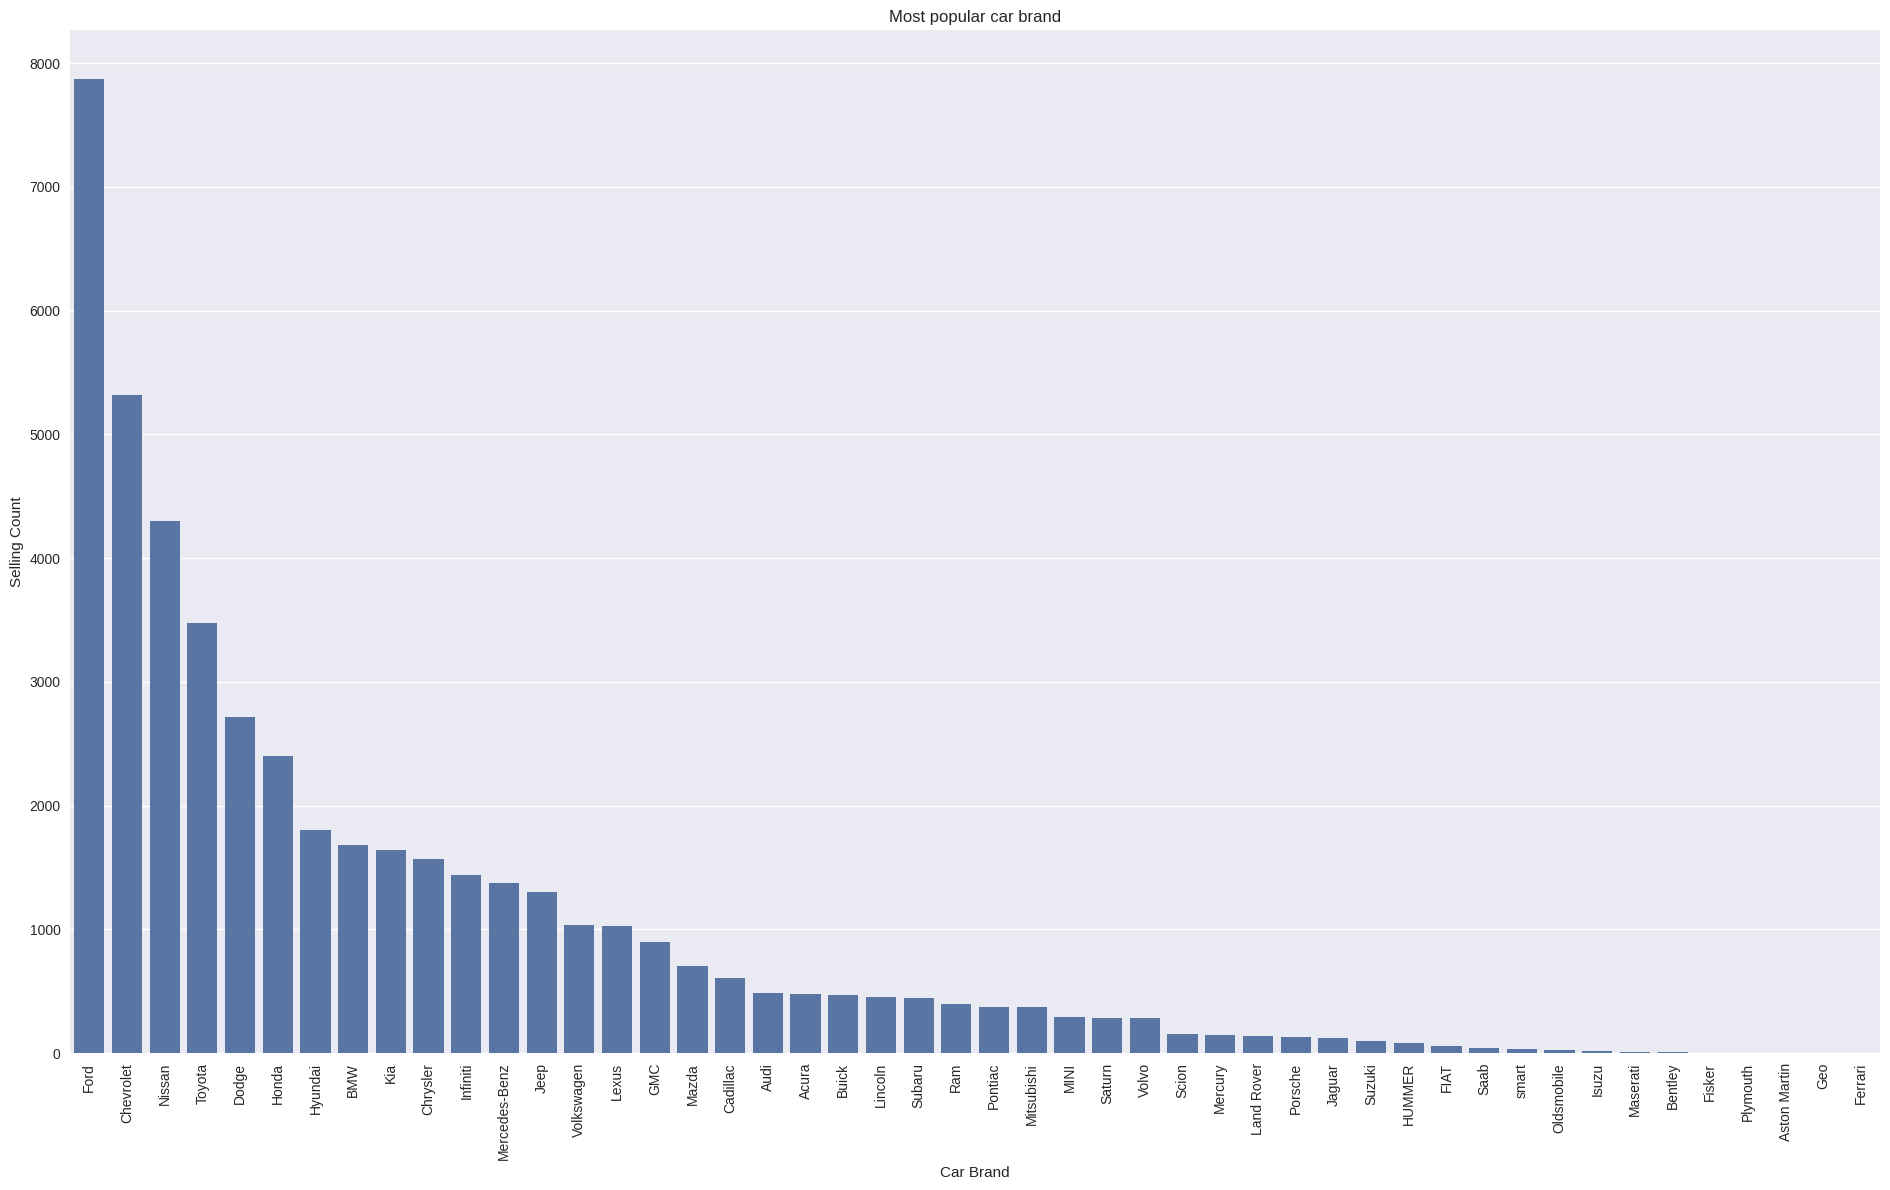

In [51]:
f = plt.figure(figsize=(19,12))
large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular car brand')
plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel('Car Brand')
plt.ylabel('Selling Count')

**We can see that Ford and Chevrolet are the most common sold types.**

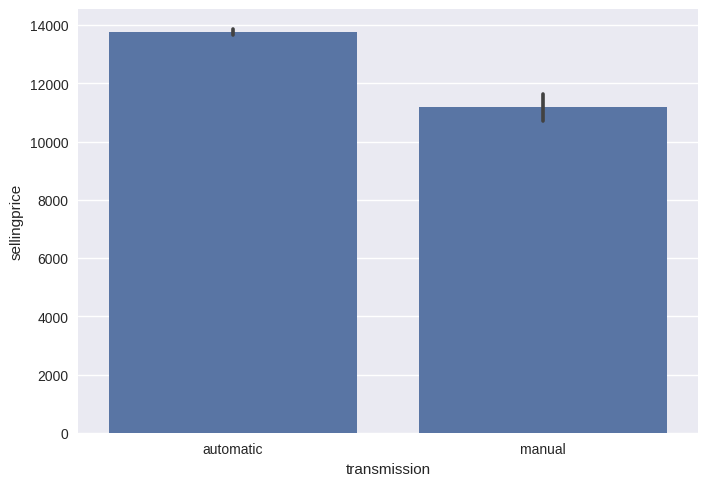

In [52]:
ax= sns.barplot(x="transmission",y="sellingprice",data=df)

**Automatic cars on average have higher prices than manual cars.**

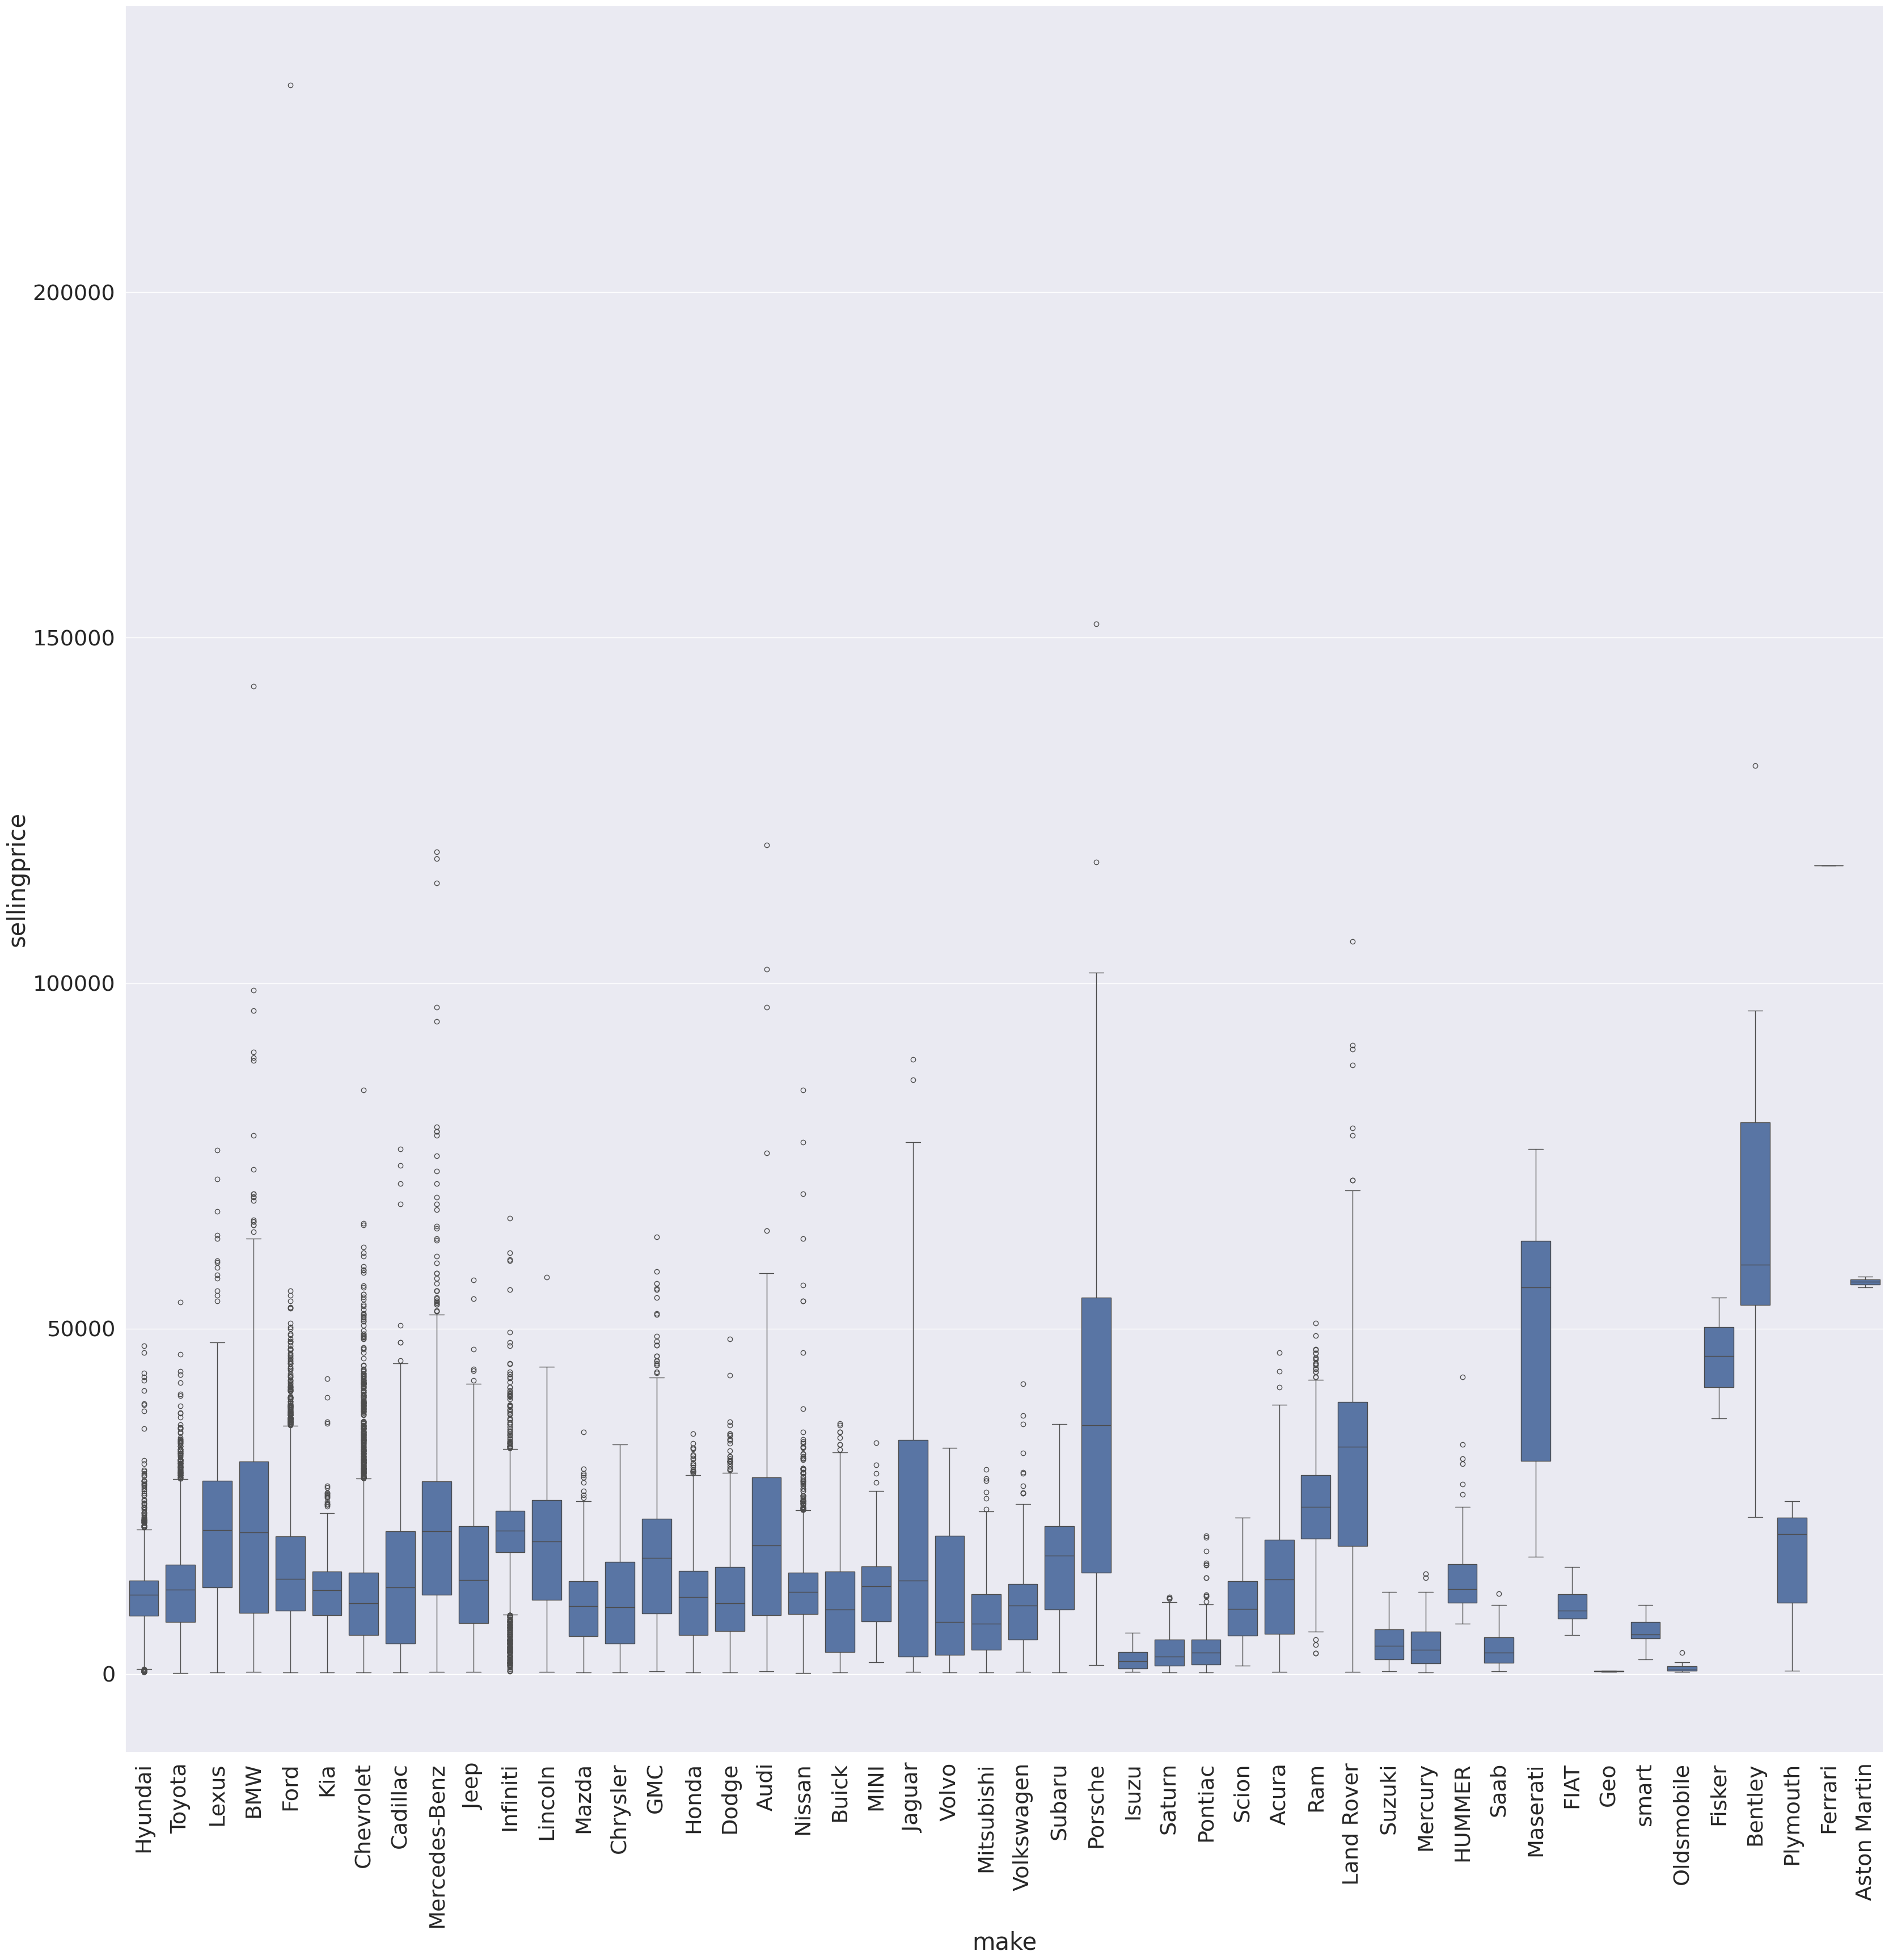

In [53]:
sns.set(font_scale=2.5)
plt.figure(figsize=(40,40))
Boxplot= sns.boxplot(x="make", y="sellingprice", data=df)
plt.xticks(rotation=90);

**It appears that Bently, Massarati and Aston Martin are some of the Higher end Brands with higher prices.**

**While Isuzu, Oldsmobile and Geo are some of the lowest price Brands.**

**We can also see that the boxplots of Porche and Maserati are the widest distributed boxes which means they cover a higher range of values.**

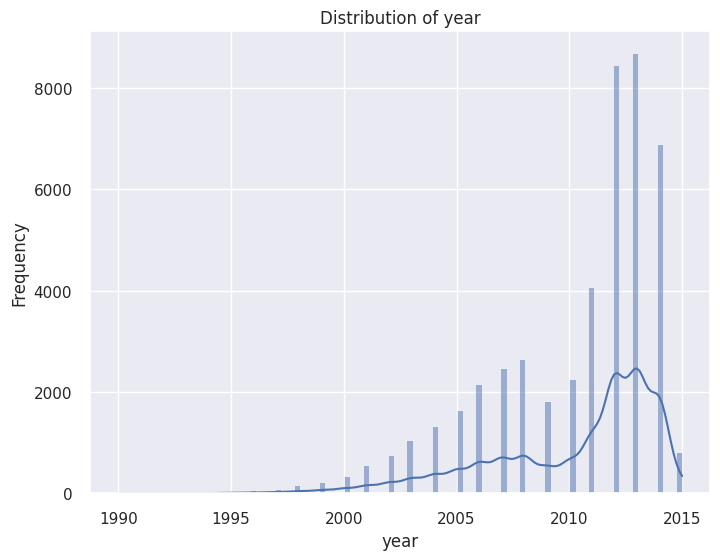

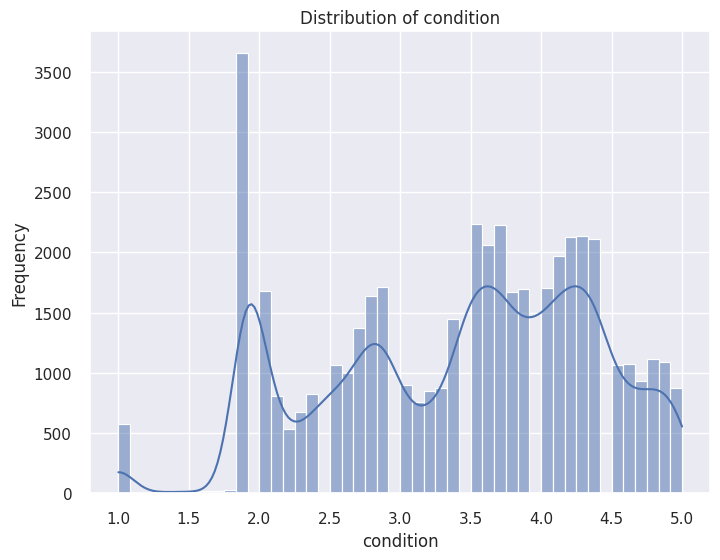

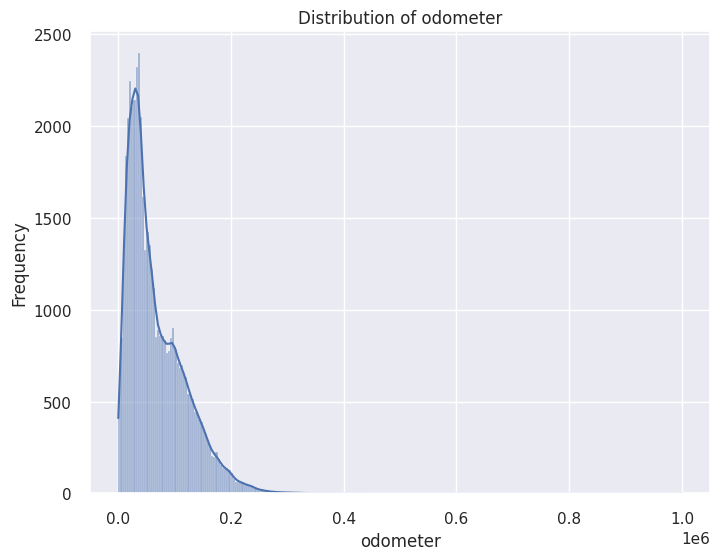

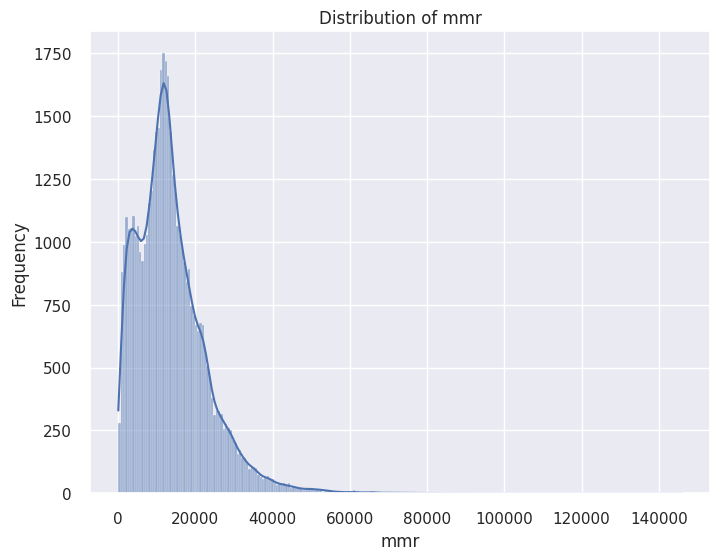

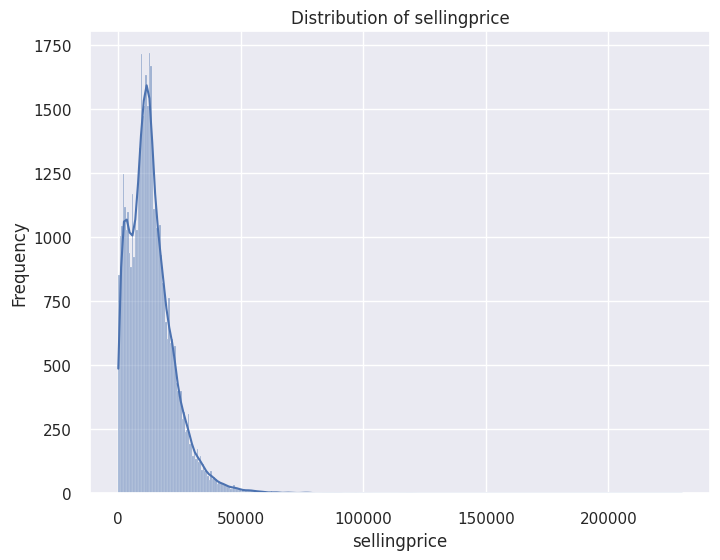

In [58]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

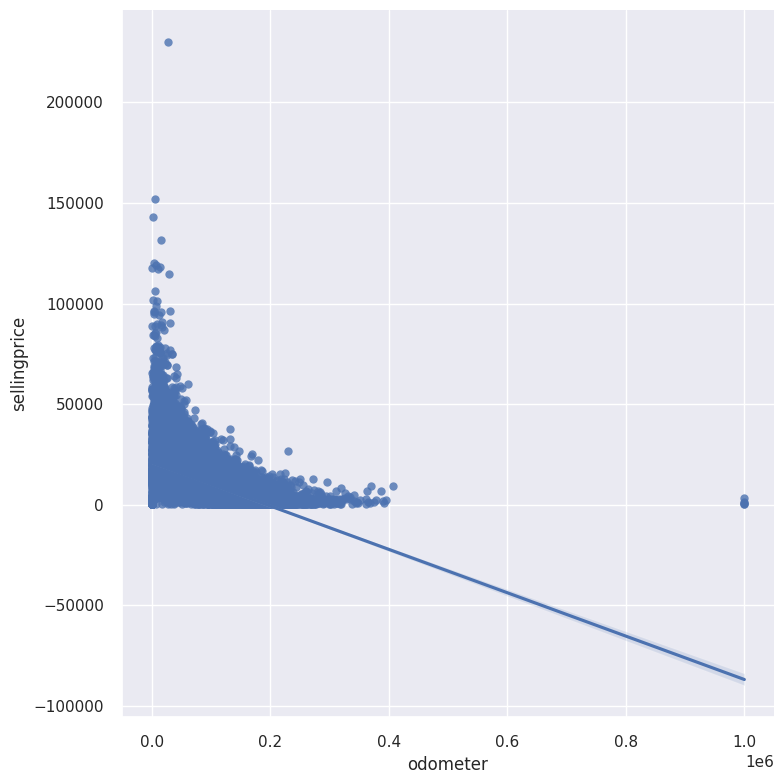

In [59]:
sns.set(font_scale=1)
sns.lmplot(x="odometer",y="sellingprice",data=df,height=8);

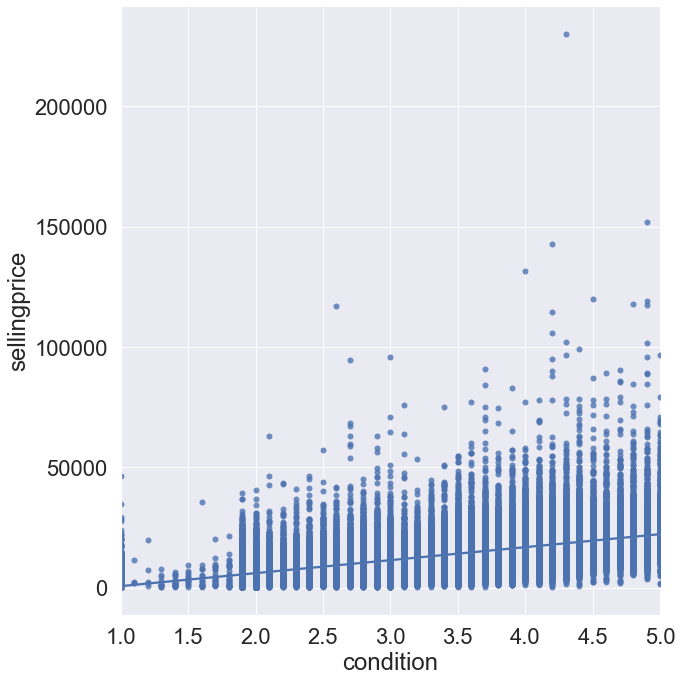

In [ ]:
sns.lmplot(x="condition",y="sellingprice",data=df,height=10)

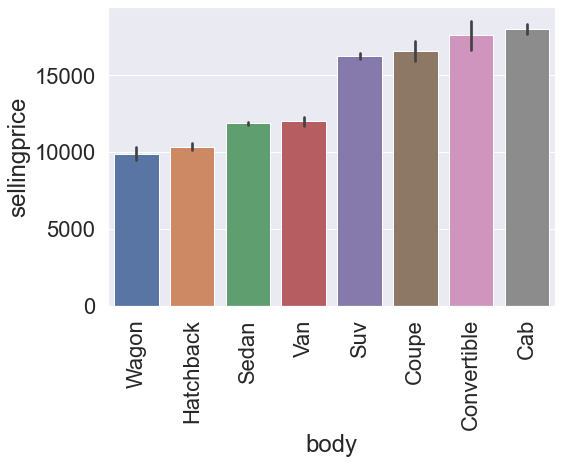

In [ ]:
order= df[["body","sellingprice"]].groupby('body').mean().sort_values("sellingprice").index

ax= sns.barplot(x="body",y="sellingprice",data=df,order=order)
plt.xticks(rotation=90);

**From the graph we can see that Cabs and Convertible cars have higher prices.**

### We can drop outliers in order to visualize better

In [ ]:
df.drop(df.index[df["odometer"]>800000], inplace = True)

In [ ]:
df.drop(df.index[df["sellingprice"]>200000], inplace = True)

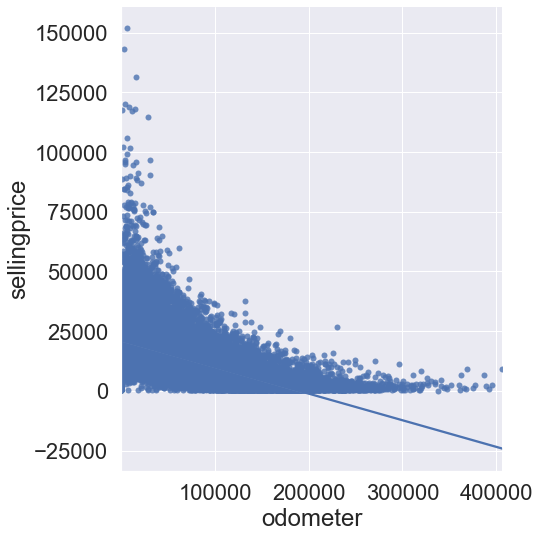

In [ ]:
sns.set(font_scale=2)
sns.lmplot(x="odometer",y="sellingprice",data=df,height=8);

**There is a negative correlation between the odometer and the selling price, this means that the higher the odometer reading in a car the lower its price.**

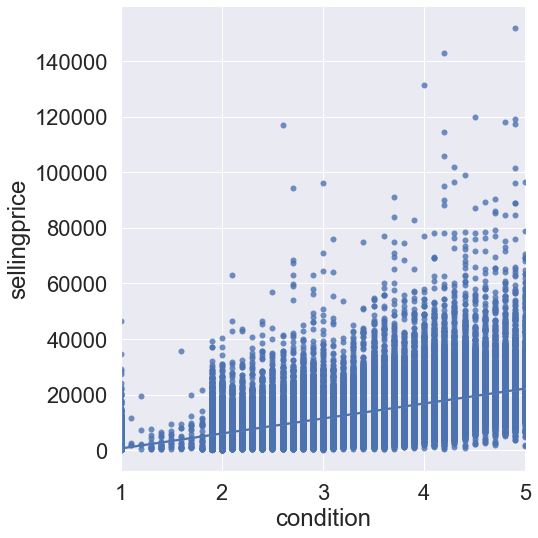

In [ ]:
sns.lmplot(x="condition",y="sellingprice",data=df,height=8);

**While the correlation between the condition of the car and its price is positive, the higher the condition the higher the price.**

#### Visualizing the correlation of columns with the price.

<Axes: >

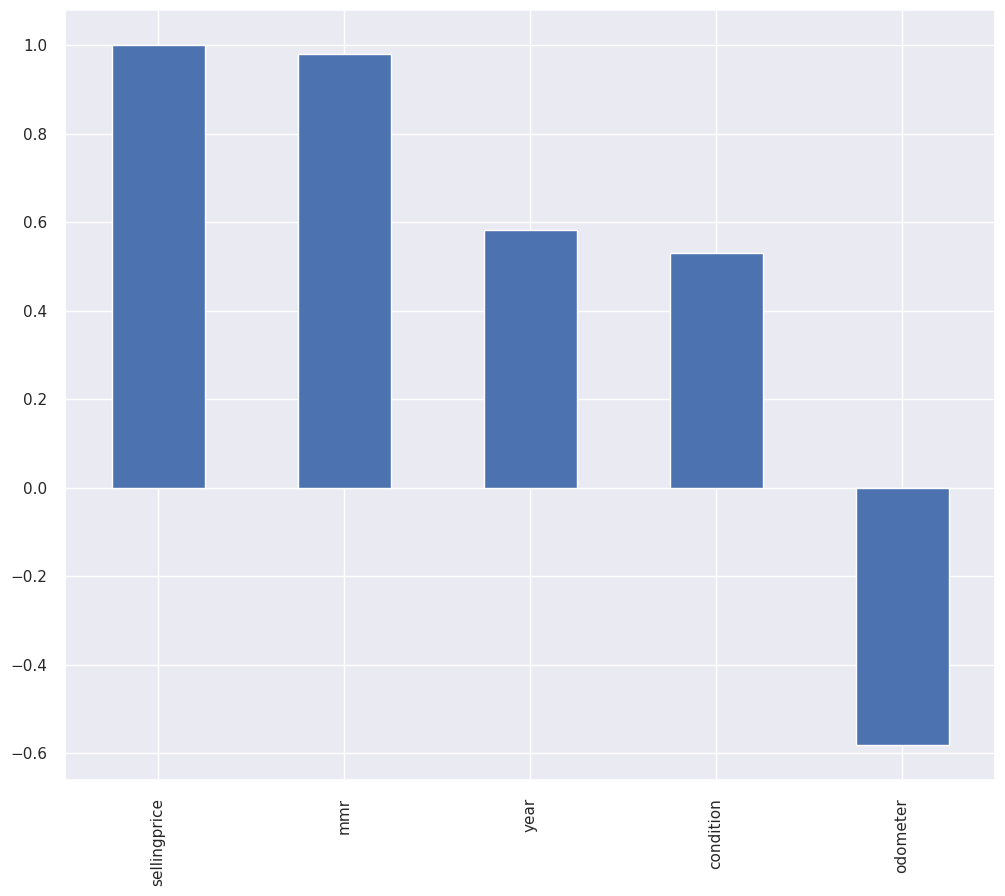

In [64]:
plt.figure(figsize=(12,10))
df.corr(numeric_only= True)['sellingprice'].sort_values(ascending = False).plot(kind='bar',h)

**The Year feature also has high positive correlation with the price, which means the higher the car manufacturing year the higher its price.**

### Encoding the data using one hot encoding since there is no ranking in the categorical columns unique values

In [ ]:
df_encodedoh = pd.get_dummies(data=df,
                           columns=df.select_dtypes(object).columns,
                           dtype='int8')
df_encodedoh

,year,condition,odometer,sellingprice,make_Acura,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,...,interior_gray,interior_green,interior_off-white,interior_orange,interior_purple,interior_red,interior_silver,interior_tan,interior_white,interior_yellow
0,2013,3.9,50404,10900,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2014,4.9,17846,29900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,4.1,21122,24200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2002,1.9,145303,3200,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,4.9,6714,22100,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,3.5,52844,17000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
46574,2012,4.5,23185,21500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46575,2013,4.2,45357,22000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
46576,2013,3.5,43376,13800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Splitting the data into testing and training data.**

In [ ]:
from sklearn.model_selection import train_test_split

x = df_encodedoh.drop('sellingprice',axis=1) # Independent variable
y = df_encodedoh['sellingprice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 32600
Testing dataset size: 13972


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

In [ ]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,-2.060889e+06
1,theta_1,year,1.035893e+03
2,theta_2,condition,1.397609e+03
3,theta_3,odometer,-4.688857e-02
4,theta_4,make_Acura,-2.760806e+03
...,...,...,...
740,theta_740,interior_red,2.424869e+03
741,theta_741,interior_silver,-2.552979e+03
742,theta_742,interior_tan,-1.903759e+03
743,theta_743,interior_white,-1.454141e+03


**Calculating the mean square error and R square values to gain insights on the performance of the model.**

In [ ]:
# sklearn regression module
y_pred_sk = lin_reg.predict(x_test)

#Evaluation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(x_test,y_test)
print('The Mean Square Error(MSE) or J(beta) is: ', J_mse_sk)
print('R square obtain for scikit learn library is :', R_square_sk)

The Mean Square Error(MSE) or J(beta) is:  16334888.862744356
R square obtain for scikit learn library is : 0.8266153704694734


**We can see that the accurace of the model is 83% which is very good.**